In [37]:
# Import needed Libraries
import nptdms
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import scipy.signal as sgnl
import math
%matplotlib inline
matplotlib.style.use('ggplot')

In [42]:
# Constants
tdms_file_path = 'C://Users//riguifd//Desktop//Nova pasta (2)//BZ0201200000_noise_ACC CALIBRATION TEST BATERIA1 LAB.tdms'
group_name = 'Time Domain'
channel_name = 'Channel 0'
start_analysis = 4.0
length_analysis = 1.0
initial_frequency = 500.0
end_frequency = 7000.0
end_analysis = start_analysis + length_analysis
dataframe_column_name = 'NVH_signal'
sample_rate = 25600
block_size = 4096
dt = 1/sample_rate
df = sample_rate/block_size
initial_freq_pt = int(round(initial_frequency/df,0))
end_freq_pt = int(round(end_frequency/df,0))
overlap = 0.3
window_size = round(block_size*(1-overlap), 0)
overlaped_size = block_size - window_size
correção_energia_hann = 1.63
correção_amplitude_hann = 2
fator_correcao = correção_energia_hann/correção_amplitude_hann

In [3]:
tdms_file = nptdms.TdmsFile(tdms_file_path)

In [4]:
channel = tdms_file.object(group_name, channel_name).as_dataframe()
channel.columns = [dataframe_column_name]
channel.head()

,NVH_signal
0.000000,-0.049497
0.000039,-0.077235
0.000078,-0.068746
0.000117,-0.043758
0.000156,-0.053682


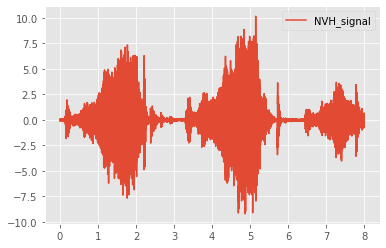

In [5]:
channel.plot()

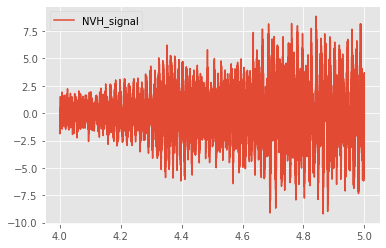

In [6]:
signal = channel.loc[start_analysis:end_analysis, :]
signal.plot()

In [7]:
x=1
while x < len(signal):
    if ((x* window_size) + overlaped_size) < len(signal):
        x+=1
    else:
        x-=1
        break
no_runs = x

In [8]:
wfm = pd.DataFrame()
for i in range(no_runs):
    col_name = 'runs' + str(i)
    start = int(i * window_size)
    end = int(start + block_size)
    print(start, end)
    wfm[col_name] = signal.iloc[start:end,:].reset_index()[dataframe_column_name]

0 4096
2867 6963
5734 9830
8601 12697
11468 15564
14335 18431
17202 21298
20069 24165


In [9]:
wfm.head()

,runs0,runs1,runs2,runs3,runs4,runs5,runs6,runs7
0,-0.414869,-1.183272,-0.446073,1.041476,-0.449660,3.629443,-0.240672,-4.217552
1,-0.244378,-0.001435,-0.068746,1.433987,-1.377316,2.626345,-1.639628,-3.178946
2,-0.180773,-0.372067,1.253094,0.340623,-1.512059,1.771620,-1.052116,-1.479180
3,-0.067192,0.441889,1.011466,1.325906,-0.409130,-0.763741,-2.936122,0.164871
4,-0.632704,-1.058572,1.421314,0.902907,-1.373610,0.389642,-4.163033,-1.299603


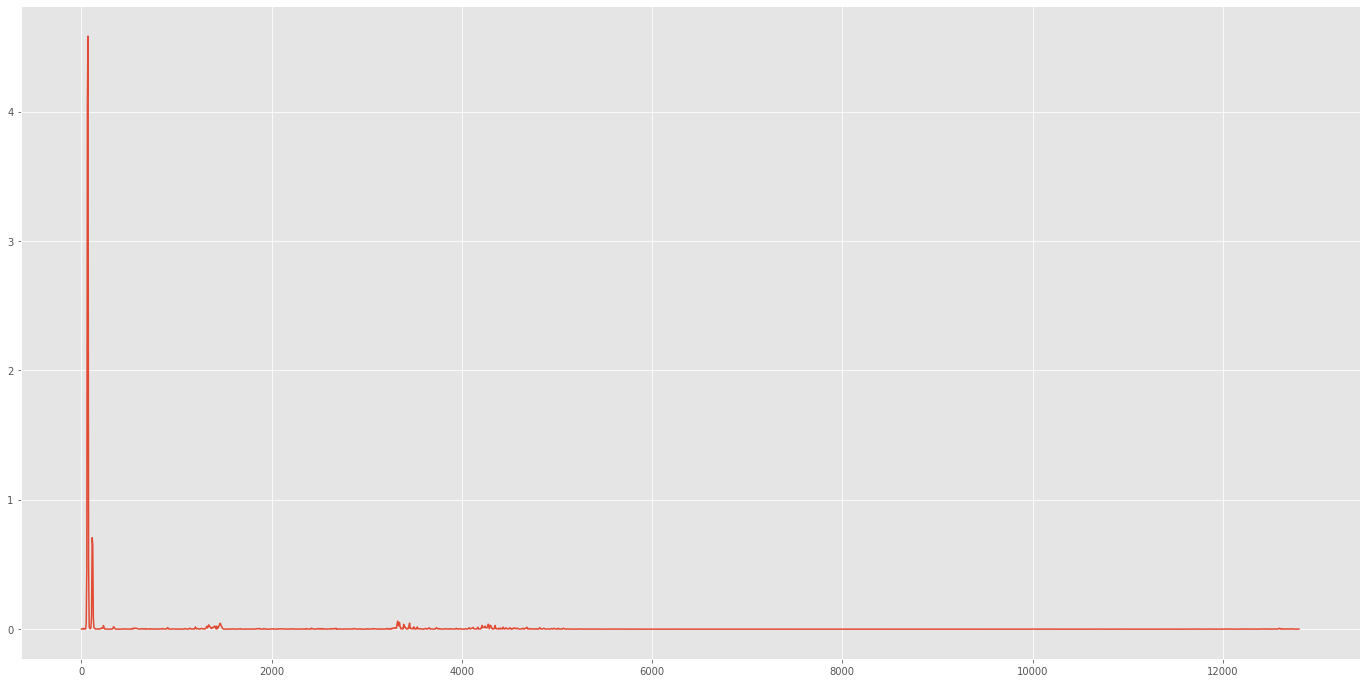

In [26]:
for i in range(no_runs):
    f, Pxx = sgnl.periodogram(x=wfm.iloc[:,i], fs=25600, window='hann', return_onesided=True, scaling='spectrum')
    if i == 0:
        fft=[0]*len(Pxx)
    fft += Pxx
a = plt.figure(figsize=(24,12))
a = plt.plot(f, Pxx)
plt.show()


In [25]:
sgnl.periodogram(x=wfm.iloc[:,i], fs=25600)

(array([0.000000e+00, 6.250000e+00, 1.250000e+01, ..., 1.278750e+04,
        1.279375e+04, 1.280000e+04]),
 array([2.03426350e-35, 8.42950268e-05, 5.43424803e-05, ...,
        5.93864182e-05, 3.57652744e-05, 7.46712755e-06]))

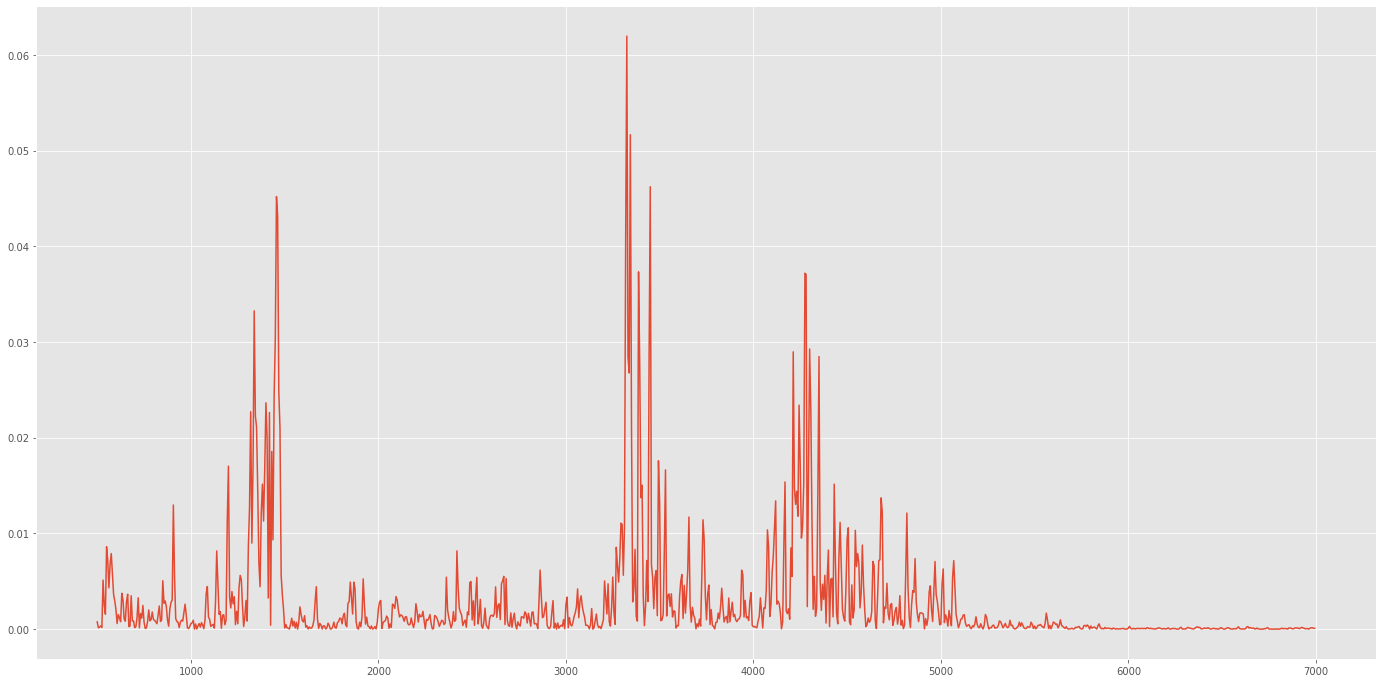

In [33]:
Pxx1 = Pxx[initial_freq_pt:end_freq_pt]
f1 = f[initial_freq_pt:end_freq_pt]
a1 = plt.figure(figsize=(24,12))
a1 = plt.plot(f1, Pxx1)
plt.show()

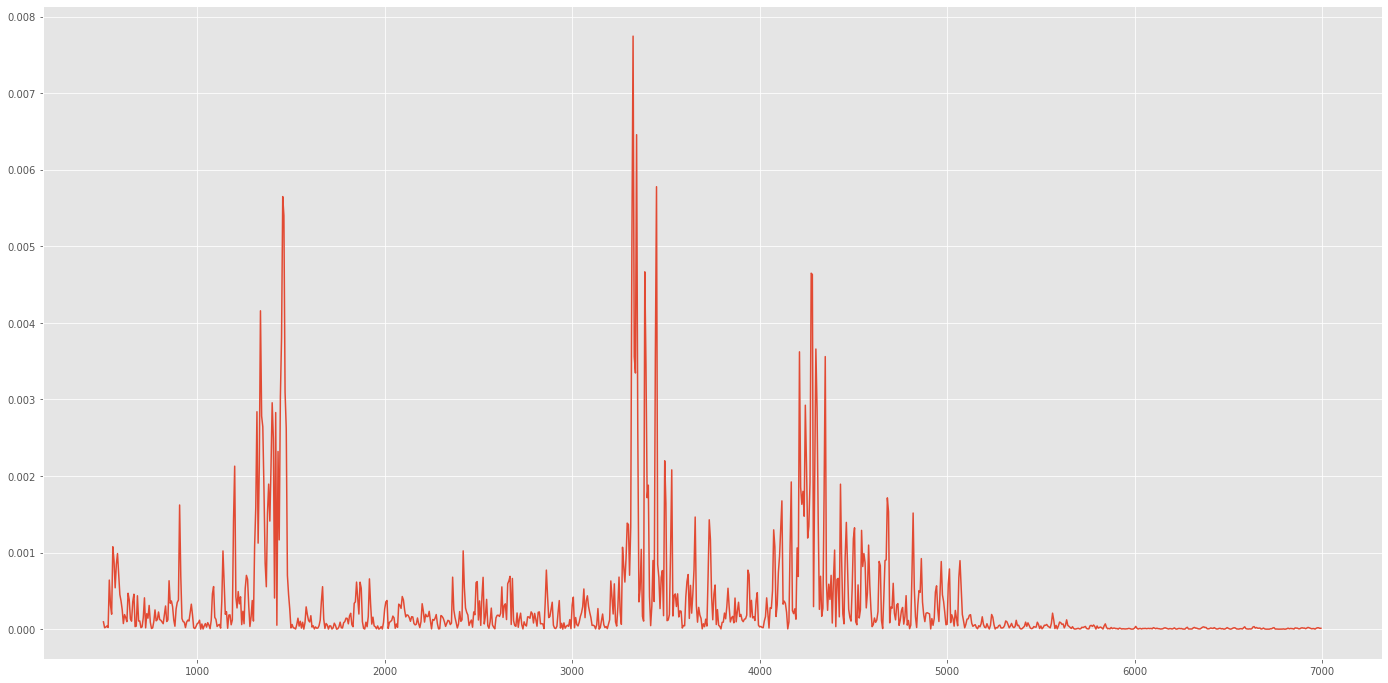

In [34]:
Pxx2 = Pxx1/no_runs
f2 = f1
a2 = plt.figure(figsize=(24,12))
a2 = plt.plot(f2, Pxx2)
plt.show()

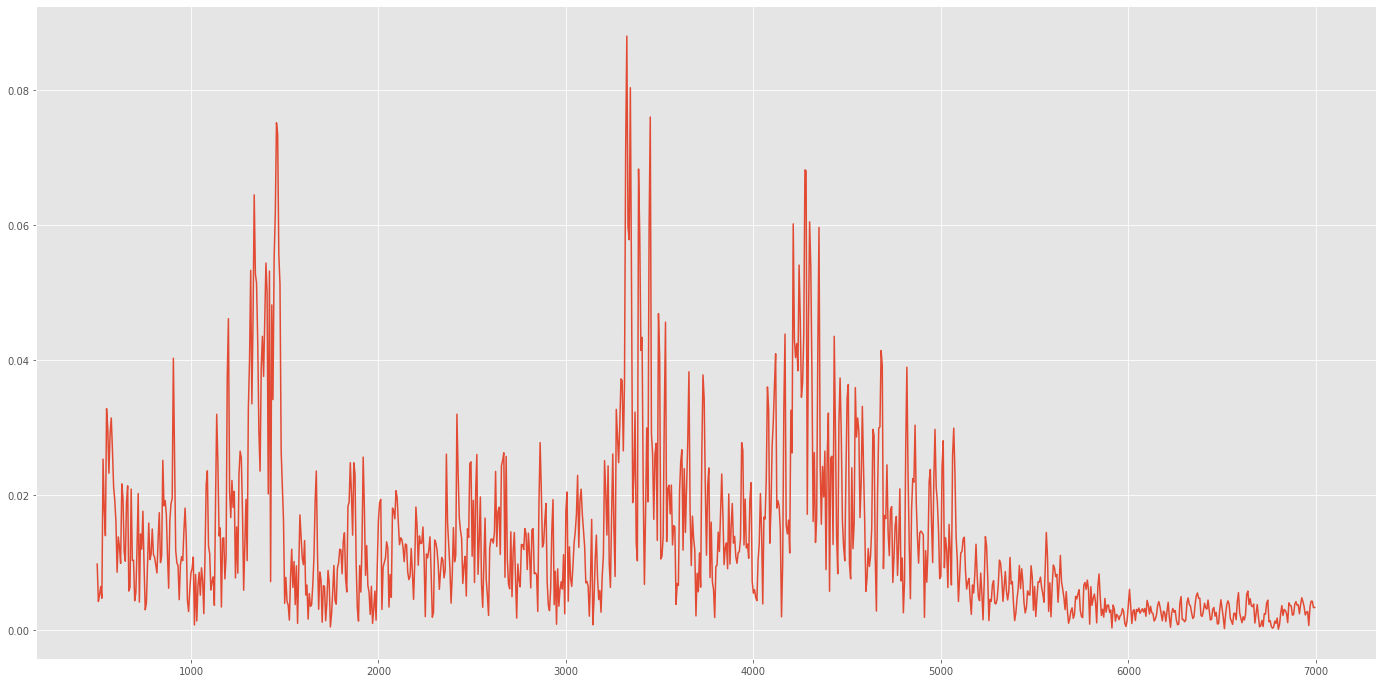

In [41]:
Pxx3 = np.sqrt(Pxx2)
f3 = f2
a3 = plt.figure(figsize=(24,12))
a3 = plt.plot(f3, Pxx3)
plt.show()

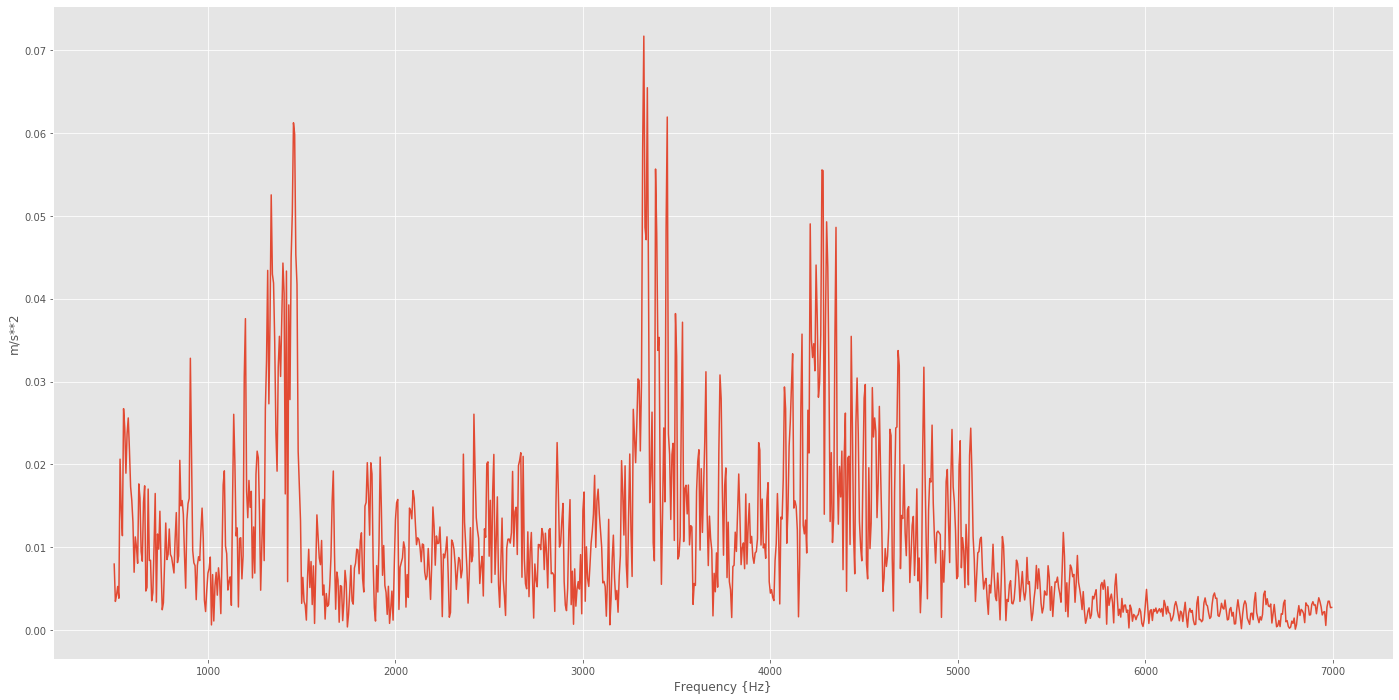

In [49]:
Pxx4 = Pxx3*fator_correcao
f4 = f3
a4 = plt.figure(figsize=(24,12))
a4 = plt.xlabel('Frequency {Hz}')
a4 = plt.ylabel('m/s**2')
a4 = plt.plot(f4, Pxx4)
plt.show()